In [28]:
#Cargar Librerias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Libreria ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
#Lectura de los datos cargados

Datos = pd.read_csv('C:/Users/Nicolas/Downloads/archive(1)/winequality-red.csv')

In [32]:
#Lectura de los datos 

Datos.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [34]:
#Descripcion de los datos

Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

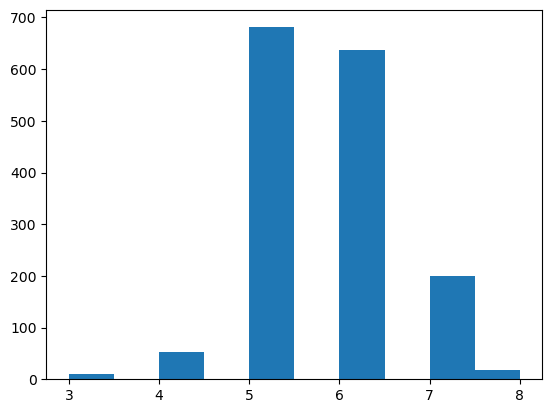

In [46]:
plt.hist(Datos.quality)

<Axes: xlabel='alcohol', ylabel='density'>

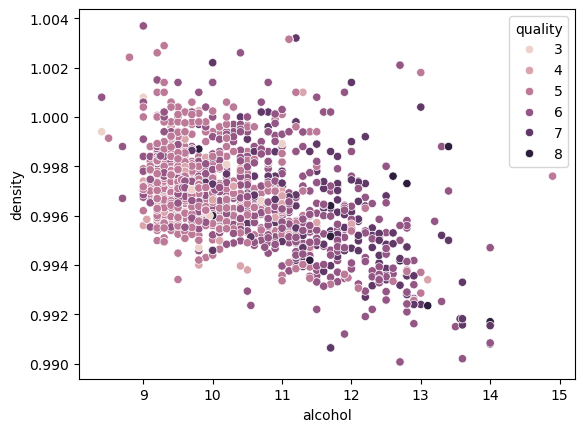

In [52]:
sns.scatterplot(x = "alcohol", y = "density", hue = "quality", data = Datos)

Text(0.5, 1.0, 'Datos Atipicos')

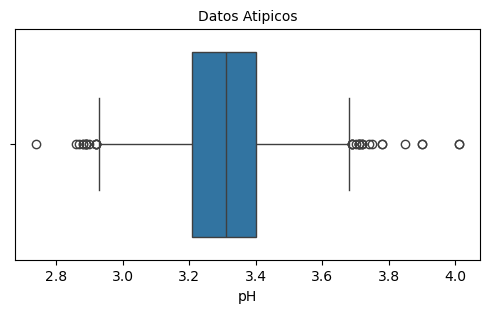

In [58]:
#Identificar datos Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['pH'])
plt.title('Datos Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Atipicos')

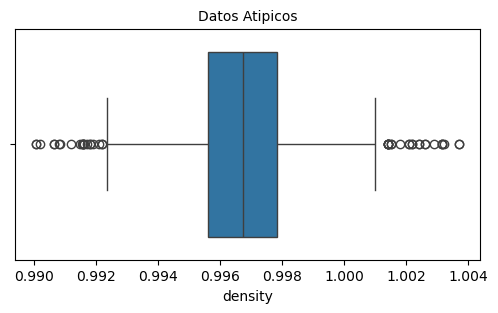

In [60]:
#Identificar datos Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['density'])
plt.title('Datos Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Atipicos')

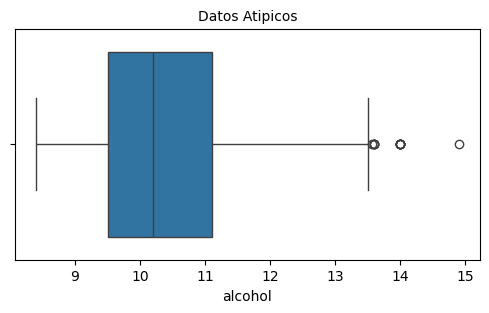

In [70]:
#Identificar datos Atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos ['alcohol'])
plt.title('Datos Atipicos', fontsize=10)

In [72]:
#Conteo Valores atipicos pH

nivel_minimo=2.9
nivel_maximo=4.0
Total_Atipicos=((Datos['pH']<nivel_minimo)|(Datos['pH']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 11


In [74]:
#Filtrar valores atipicos

Datos=Datos[(Datos['pH']<nivel_maximo)&(Datos['pH']>nivel_minimo)]

In [76]:
#Validar valores atipicos

Total_Atipicos=((Datos['pH']<nivel_minimo)|(Datos['pH']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 0


In [78]:
#Conteo Valores atipicos density

nivel_minimo=0.990
nivel_maximo=1.003
Total_Atipicos=((Datos['density']<nivel_minimo)|(Datos['density']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 6


In [80]:
#Filtrar valores atipicos

Datos=Datos[(Datos['density']<nivel_maximo)&(Datos['density']>nivel_minimo)]

In [82]:
Total_Atipicos=((Datos['density']<nivel_minimo)|(Datos['density']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 0


In [84]:
#Conteo Valores atipicos alcohol

nivel_minimo=8.0
nivel_maximo=14.5
Total_Atipicos=((Datos['alcohol']<nivel_minimo)|(Datos['alcohol']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 1


In [86]:
#Filtrar valores atipicos

Datos=Datos[(Datos['alcohol']<nivel_maximo)&(Datos['alcohol']>nivel_minimo)]

In [88]:
Total_Atipicos=((Datos['alcohol']<nivel_minimo)|(Datos['alcohol']>nivel_maximo)).sum()
print("Total Datos Atipicos es {}".format(Total_Atipicos))

Total Datos Atipicos es 0


In [90]:
#Calidad de vino

Datos['quality'].value_counts()

quality
5    674
6    629
7    198
4     52
8     17
3     10
Name: count, dtype: int64

In [92]:
#Porcentaje para trabajar en Train y Test

X = Datos.drop('quality', axis=1)
Y = Datos['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [94]:
print (X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1137           10.4             0.520         0.45             2.0      0.080   
1135            8.0             0.250         0.43             1.7      0.067   
561             9.0             0.440         0.49             2.4      0.078   
1288            7.0             0.600         0.30             4.5      0.068   
894             7.2             0.630         0.03             2.2      0.080   
...             ...               ...          ...             ...        ...   
427             9.5             0.780         0.22             1.9      0.077   
1485            7.0             0.655         0.16             2.1      0.074   
1436           10.0             0.380         0.38             1.6      0.169   
205            12.8             0.300         0.74             2.6      0.095   
487            10.2             0.645         0.36             1.8      0.053   

      free sulfur dioxide  

In [96]:
print (X_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493             8.7             0.690         0.31            3.00      0.086   
64              7.2             0.725         0.05            4.65      0.086   
356            11.5             0.410         0.52            3.00      0.080   
319             9.6             0.770         0.12            2.90      0.082   
1107            9.1             0.300         0.41            2.00      0.068   
...             ...               ...          ...             ...        ...   
930             6.6             0.610         0.01            1.90      0.080   
1063           10.2             0.290         0.65            2.40      0.075   
1589            6.6             0.725         0.20            7.80      0.073   
846             6.4             0.640         0.21            1.80      0.081   
961             7.1             0.560         0.14            1.60      0.078   

      free sulfur dioxide  

In [102]:
#Modelo Arbol de Dicision

tree = DecisionTreeClassifier()

In [104]:
arbol = tree.fit(X_train, Y_train)

[Text(0.5552083473176888, 0.975, 'x[10] <= 10.525\ngini = 0.643\nsamples = 1185\nvalue = [7.0, 39.0, 505.0, 472.0, 149.0, 13.0]'),
 Text(0.3676124845612716, 0.925, 'x[6] <= 98.5\ngini = 0.546\nsamples = 730\nvalue = [4.0, 25.0, 426.0, 243.0, 31.0, 1.0]'),
 Text(0.4614104159394802, 0.95, 'True  '),
 Text(0.22840507867038987, 0.875, 'x[9] <= 0.555\ngini = 0.567\nsamples = 647\nvalue = [4, 24, 352, 236, 30, 1]'),
 Text(0.0797980882826764, 0.825, 'x[10] <= 10.35\ngini = 0.465\nsamples = 198\nvalue = [2.0, 13.0, 137.0, 45.0, 1.0, 0.0]'),
 Text(0.06175491354312104, 0.775, 'x[6] <= 88.5\ngini = 0.43\nsamples = 179\nvalue = [2, 11, 130, 35, 1, 0]'),
 Text(0.046289335194930725, 0.725, 'x[3] <= 1.25\ngini = 0.412\nsamples = 168\nvalue = [2, 11, 125, 29, 1, 0]'),
 Text(0.03941574481795725, 0.675, 'x[1] <= 0.732\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0]'),
 Text(0.03597894962947052, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.04285254000644399, 0.625, 'gini = 

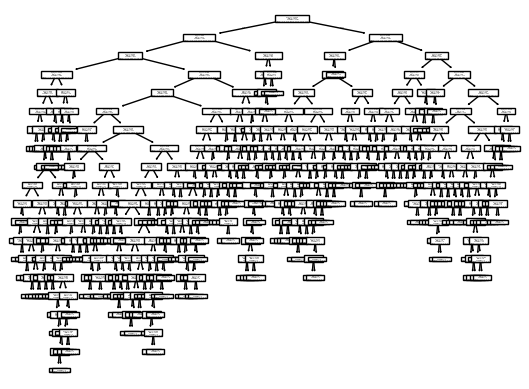

In [106]:
plot_tree(arbol)

In [108]:
predicciones = arbol.predict(X_test)

In [110]:
predicciones

array([6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 7, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 4, 5, 5, 5, 5, 5, 5, 6, 7, 6, 7, 7, 6, 5, 5, 5, 7,
       6, 4, 5, 6, 7, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 6, 8, 7, 7, 6, 5, 6,
       5, 6, 6, 5, 6, 6, 5, 6, 7, 7, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6,
       4, 6, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 7, 6, 6, 7, 7, 5, 5, 6, 5, 5, 6, 6, 7, 5, 6, 7, 7, 6,
       5, 5, 7, 6, 5, 7, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6,
       6, 7, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5, 6, 7, 5, 6, 5,
       5, 6, 6, 7, 4, 6, 6, 5, 5, 7, 7, 6, 6, 6, 5, 6, 5, 5, 7, 7, 6, 6,
       6, 6, 5, 6, 6, 5, 7, 6, 6, 5, 5, 6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 7,
       7, 6, 5, 5, 7, 7, 5, 5, 7, 4, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6,
       6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 7, 5, 5, 7, 5, 6, 6, 6, 7, 7, 5, 5,
       5, 6, 5, 6, 6, 6, 6, 3, 7, 6, 7, 4, 6, 7, 5, 6, 7, 6, 7, 5, 6, 7,
       6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 7, 7, 6, 5, 6,

In [114]:
#Examinar matrix de confusion

pd.crosstab(np.array([Y[0] for y in Y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
5,2,9,162,156,65,1


In [116]:
accuracy = accuracy_score(Y_test,predicciones)
accuracy

0.620253164556962

In [120]:
precision = precision_score(Y_test, predicciones, average='weighted')
precision

0.617242477791001

In [122]:
recall = recall_score(Y_test, predicciones, average='weighted')
recall

0.620253164556962

In [126]:
f1 = f1_score(Y_test, predicciones, average='weighted')
f1

0.6171934748284175